In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams.update({'font.size': 15})

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from pandas_datareader.data import DataReader

from datetime import datetime
import yfinance as yf

In [2]:
# Set start and end time for data grab
end = '2023-12-15'
start = '2022-11-30'

NVDA = yf.download('NVDA',  start, end)
SO = yf.download('SO', start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# NVDA

In [3]:

# Create a new dataframe with only the 'Close column
NVDA = NVDA.filter(['Close'])
# Convert the dataframe to a numpy array
NVDA_dataset = NVDA.values
# Train test split
train_size_NVDA = int(np.ceil( len(NVDA_dataset) * .80 ))

train_size_NVDA

210

In [4]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
NVDA_scaled = scaler.fit_transform(NVDA_dataset)

In [5]:
# Create scaled training data set
train_NVDA = NVDA_scaled[0:int(train_size_NVDA), :]
# Split the data into x_train and y_train data sets
x_train_NV = []
y_train_NV = []

for i in range(30, len(train_NVDA)):
    x_train_NV.append(train_NVDA[i-30:i, 0])
    y_train_NV.append(train_NVDA[i, 0])
    if i<= 31:
        print(x_train_NV)
        print(y_train_NV)
        print()

# Convert the x_train and y_train to numpy arrays
x_train_NV, y_train_NV = np.array(x_train_NV), np.array(y_train_NV)

# Reshape the data
x_train_NV = np.reshape(x_train_NV, (x_train_NV.shape[0], x_train_NV.shape[1], 1))

[array([0.07937205, 0.08520058, 0.07807988, 0.07076679, 0.05363867,
       0.05729524, 0.08613533, 0.08151649, 0.09619775, 0.11096143,
       0.10001926, 0.08016937, 0.06969457, 0.06097928, 0.05633301,
       0.06777003, 0.03582327, 0.03216671, 0.00233692, 0.        ,
       0.01558848, 0.0158909 , 0.00767051, 0.01960247, 0.00629586,
       0.02262666, 0.04376873, 0.05149423, 0.05402357, 0.06804498])]
[0.07871224594921367]

[array([0.07937205, 0.08520058, 0.07807988, 0.07076679, 0.05363867,
       0.05729524, 0.08613533, 0.08151649, 0.09619775, 0.11096143,
       0.10001926, 0.08016937, 0.06969457, 0.06097928, 0.05633301,
       0.06777003, 0.03582327, 0.03216671, 0.00233692, 0.        ,
       0.01558848, 0.0158909 , 0.00767051, 0.01960247, 0.00629586,
       0.02262666, 0.04376873, 0.05149423, 0.05402357, 0.06804498]), array([0.08520058, 0.07807988, 0.07076679, 0.05363867, 0.05729524,
       0.08613533, 0.08151649, 0.09619775, 0.11096143, 0.10001926,
       0.08016937, 0.06969457, 0.

In [6]:
# Build model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train_NV.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train_NV, y_train_NV, batch_size=64, epochs=50, verbose=1)

Epoch 1/50
3/3 [==============================] - 14s 282ms/step - loss: 0.1906
Epoch 2/50
3/3 [==============================] - 1s 221ms/step - loss: 0.0354
Epoch 3/50
3/3 [==============================] - 1s 235ms/step - loss: 0.0151
Epoch 4/50
3/3 [==============================] - 1s 279ms/step - loss: 0.0165
Epoch 5/50
3/3 [==============================] - 1s 258ms/step - loss: 0.0197
Epoch 6/50
3/3 [==============================] - 1s 227ms/step - loss: 0.0069
Epoch 7/50
3/3 [==============================] - 0s 144ms/step - loss: 0.0084
Epoch 8/50
3/3 [==============================] - 0s 140ms/step - loss: 0.0096
Epoch 9/50
3/3 [==============================] - 1s 177ms/step - loss: 0.0044
Epoch 10/50
3/3 [==============================] - 0s 159ms/step - loss: 0.0057
Epoch 11/50
3/3 [==============================] - 0s 165ms/step - loss: 0.0059
Epoch 12/50
3/3 [==============================] - 0s 143ms/step - loss: 0.0037
Epoch 13/50
3/3 [==============================]

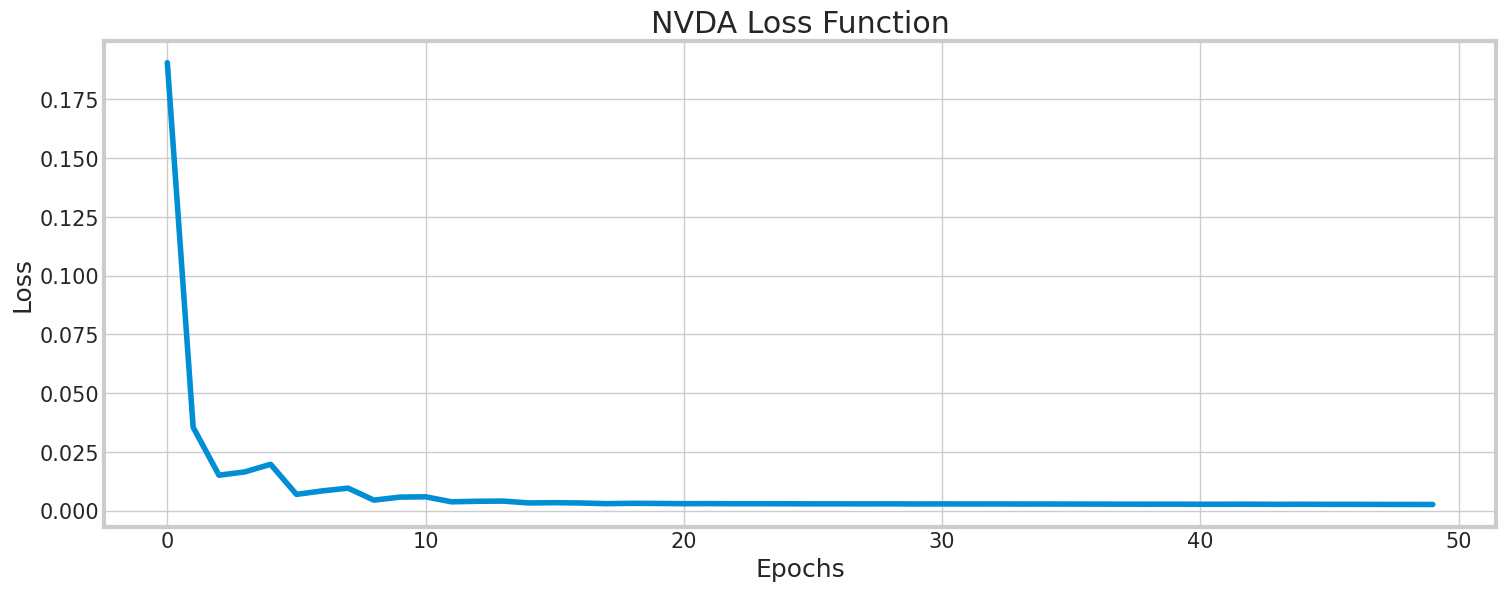

In [7]:
plt.figure(figsize=(16,6))
plt.title('NVDA Loss Function')
plt.plot(history.history['loss'])
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [8]:
test_data_NVDA = NVDA_scaled[train_size_NVDA - 30: , :]
# Create the data sets x_test and y_test
x_test_NVDA = []
y_test_NVDA = NVDA_dataset[train_size_NVDA:, :]
for i in range(30, len(test_data_NVDA)):
    x_test_NVDA.append(test_data_NVDA[i-30:i, 0])

# Convert the data to a numpy array
x_test_NVDA = np.array(x_test_NVDA)

# Reshape the data
x_test_NVDA = np.reshape(x_test_NVDA, (x_test_NVDA.shape[0], x_test_NVDA.shape[1], 1 ))

# Get the models predicted price values
NVDA_pred = model.predict(x_test_NVDA)
NVDA_pred = scaler.inverse_transform(NVDA_pred)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_NVDA, NVDA_pred))

# Calculate MAE
mae = mean_absolute_error(y_test_NVDA, NVDA_pred)

# Calculate MSE
mse = mean_squared_error(y_test_NVDA, NVDA_pred)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_NVDA, NVDA_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

2/2 [==============================] - 2s 46ms/step
RMSE: 22.706474017094543
MAE: 19.42205634483924
MSE: 515.5839622889896
MAPE: 0.04255178988414351


<ipython-input-9-92c5930f0f89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = NVDA_pred


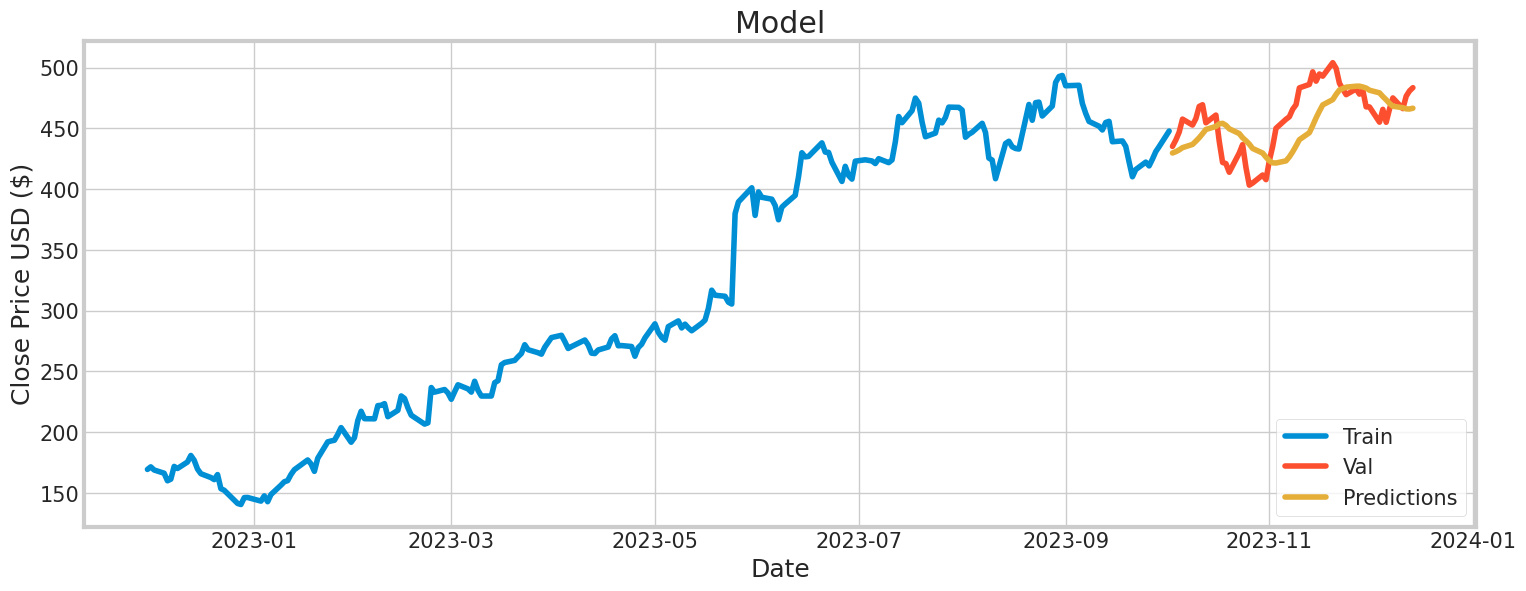

In [9]:
train = NVDA[:train_size_NVDA]
valid = NVDA[train_size_NVDA:]
valid['Predictions'] = NVDA_pred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# SO

In [10]:

# Create a new dataframe with only the 'Close column
SO = SO.filter(['Close'])
# Convert the dataframe to a numpy array
SO_dataset = SO.values
# Train test split
train_size_SO = int(np.ceil( len(SO_dataset) * .80 ))

train_size_SO

210

In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
SO_scaled = scaler.fit_transform(SO_dataset)

In [12]:
# Create scaled training data set for SO
train_SO = SO_scaled[0:int(train_size_SO), :]
# Split the data into x_train and y_train data sets
x_train_SO = []
y_train_SO = []

for i in range(60, len(train_SO)):
    x_train_SO.append(train_SO[i-60:i, 0])
    y_train_SO.append(train_SO[i, 0])
    if i <= 61:
        print(x_train_SO)
        print(y_train_SO)
        print()

# Convert the x_train and y_train to numpy arrays
x_train_SO, y_train_SO = np.array(x_train_SO), np.array(y_train_SO)

# Reshape the data
x_train_SO = np.reshape(x_train_SO, (x_train_SO.shape[0], x_train_SO.shape[1], 1))

[array([0.39880046, 0.4047976 , 0.37631148, 0.38680676, 0.46176925,
       0.46326825, 0.47676152, 0.45277355, 0.65292328, 0.66641655,
       0.65892041, 0.60344833, 0.5329834 , 0.49400315, 0.53598196,
       0.63043487, 0.63268365, 0.70614658, 0.74587661, 0.69940023,
       0.73988005, 0.68140939, 0.71814085, 0.76386802, 0.60419754,
       0.69790066, 0.68815574, 0.65892041, 0.69265331, 0.60119897,
       0.59969997, 0.57946035, 0.4047976 , 0.3095949 , 0.35982021,
       0.3403298 , 0.32833553, 0.37031492, 0.38980475, 0.425787  ,
       0.3830584 , 0.40179903, 0.4902548 , 0.47226396, 0.37106413,
       0.41829087, 0.40629659, 0.3095949 , 0.25937017, 0.3418288 ,
       0.36056942, 0.32458775, 0.33358288, 0.26536731, 0.32308818,
       0.24212912, 0.21889035, 0.1814091 , 0.16791583, 0.15367335])]
[0.055472373192809066]

[array([0.39880046, 0.4047976 , 0.37631148, 0.38680676, 0.46176925,
       0.46326825, 0.47676152, 0.45277355, 0.65292328, 0.66641655,
       0.65892041, 0.60344833, 0.5

In [13]:
# Build model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train_SO.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(15))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train_SO, y_train_SO, batch_size=64, epochs=50, verbose=1)

Epoch 1/50
3/3 [==============================] - 4s 55ms/step - loss: 0.2365
Epoch 2/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0453
Epoch 3/50
3/3 [==============================] - 0s 56ms/step - loss: 0.0586
Epoch 4/50
3/3 [==============================] - 0s 57ms/step - loss: 0.0401
Epoch 5/50
3/3 [==============================] - 0s 53ms/step - loss: 0.0206
Epoch 6/50
3/3 [==============================] - 0s 54ms/step - loss: 0.0284
Epoch 7/50
3/3 [==============================] - 0s 53ms/step - loss: 0.0296
Epoch 8/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0230
Epoch 9/50
3/3 [==============================] - 0s 58ms/step - loss: 0.0188
Epoch 10/50
3/3 [==============================] - 0s 57ms/step - loss: 0.0200
Epoch 11/50
3/3 [==============================] - 0s 64ms/step - loss: 0.0209
Epoch 12/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0189
Epoch 13/50
3/3 [==============================] - 0s 53ms/st

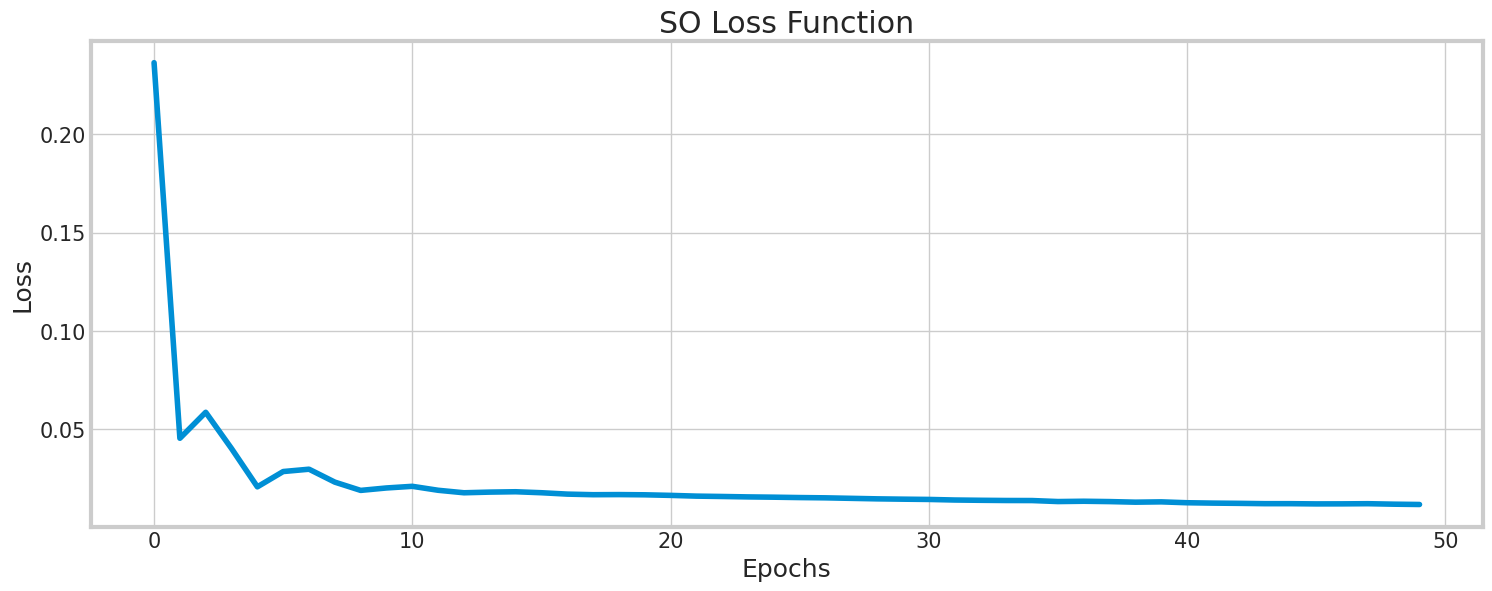

In [14]:
plt.figure(figsize=(16,6))
plt.title('SO Loss Function')
plt.plot(history.history['loss'])
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [15]:
test_data_SO = SO_scaled[train_size_SO - 60: , :]
# Create the data sets x_test and y_test
x_test_SO = []
y_test_SO = SO_dataset[train_size_SO:, :]
for i in range(60, len(test_data_SO)):
    x_test_SO.append(test_data_SO[i-60:i, 0])

# Convert the data to a numpy array
x_test_SO = np.array(x_test_SO)

# Reshape the data
x_test_SO = np.reshape(x_test_SO, (x_test_SO.shape[0], x_test_SO.shape[1], 1))

# Get the model's predicted price values
SO_pred = model.predict(x_test_SO)
SO_pred = scaler.inverse_transform(SO_pred)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_SO, SO_pred))

# Calculate MAE
mae = mean_absolute_error(y_test_SO, SO_pred)

# Calculate MSE
mse = mean_squared_error(y_test_SO, SO_pred)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_SO, SO_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')


2/2 [==============================] - 1s 17ms/step
RMSE: 1.0789999230742566
MAE: 0.8261222839355469
MSE: 1.1642408339942518
MAPE: 0.012176695150489174


<ipython-input-16-0c4e842bec89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_SO['Predictions'] = SO_pred


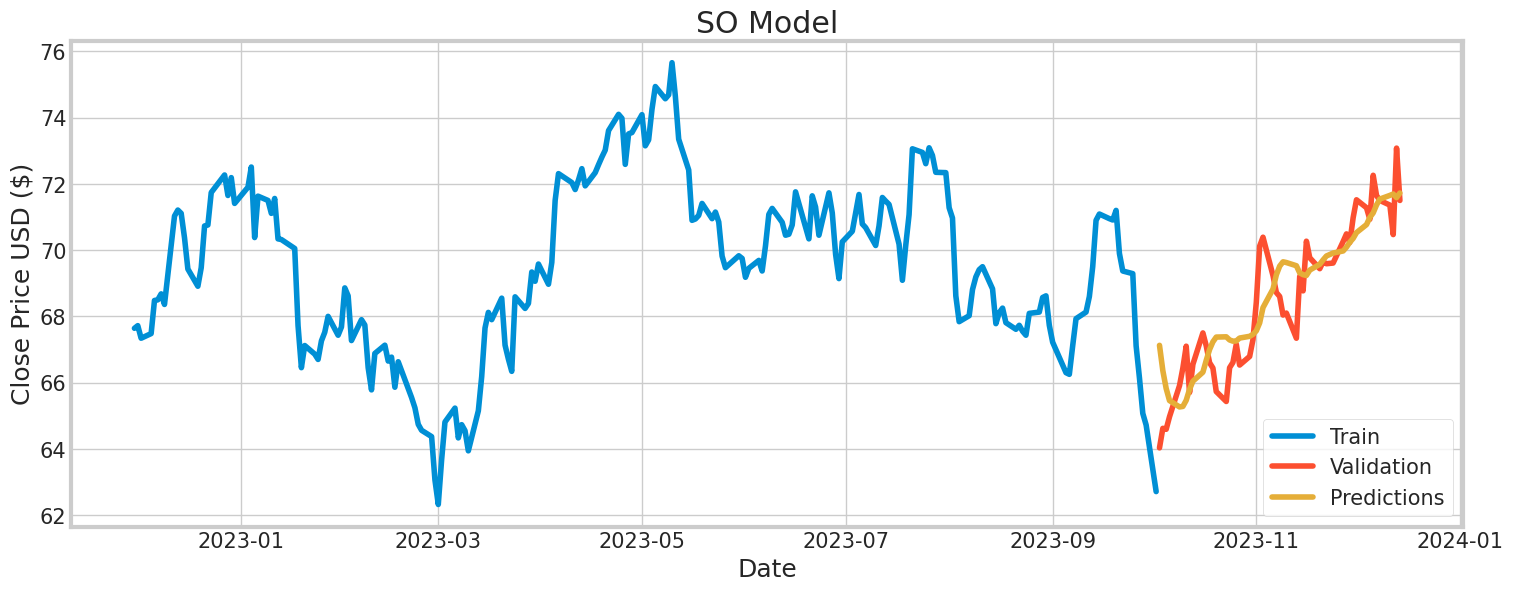

In [16]:
train_SO = SO[:train_size_SO]
valid_SO = SO[train_size_SO:]
valid_SO['Predictions'] = SO_pred

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('SO Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_SO['Close'])
plt.plot(valid_SO[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()
